In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [84]:
teams_dict = {}
with engine.connect() as conn:

    team_stm = (
        select(players_table.c.team)
        .group_by(players_table.c.team)
    )

    team_stm_result = conn.execute(team_stm)
    teams = team_stm_result.scalars().all()

for i, team in enumerate(teams):
    teams_dict[i] = team

teams_dict

{0: '1st', 1: 'U17', 2: 'U18', 3: 'U23'}

<Axes: xlabel='position', ylabel='Distance'>

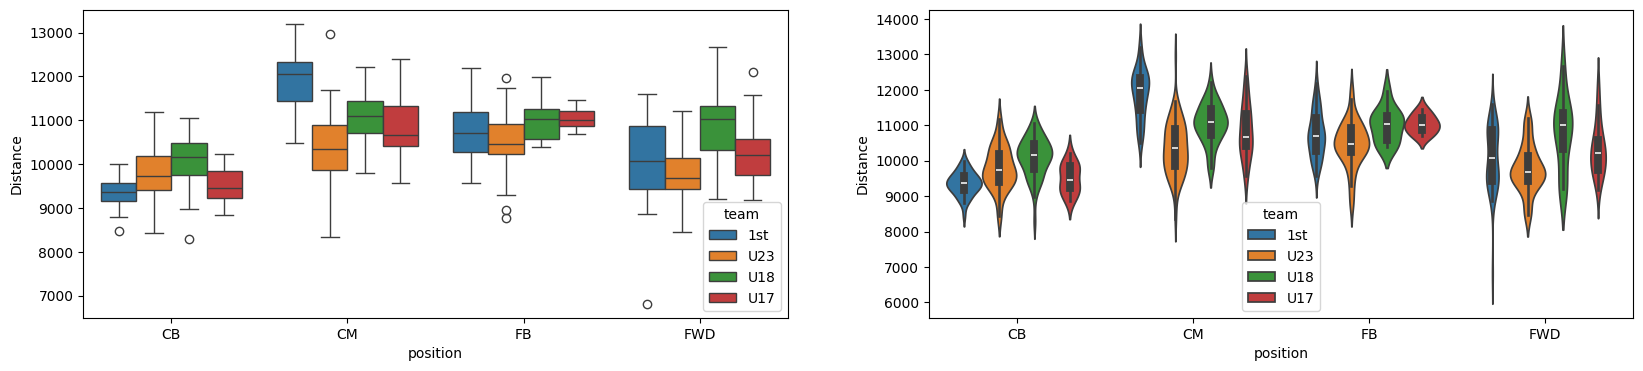

In [79]:
measure = "Distance"
measures = sessions_data_table.columns
measures[measure]

with engine.connect() as conn:
    stmt = (
        select(players_table.c.team, players_table.c.position, measures[measure])
        .join(sessions_data_table, players_table.c.id == sessions_data_table.c.player_id)
    )

    data = conn.execute(stmt).mappings().all()

df = pd.DataFrame(data)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

sns.boxplot(x = df["position"],
            y = df[measure],
            hue = df["team"],
            ax=axs[0])


sns.violinplot(x = df["position"],
            y = df[measure],
            hue = df["team"],
            ax=axs[1])



<Axes: xlabel='team', ylabel='Distance'>

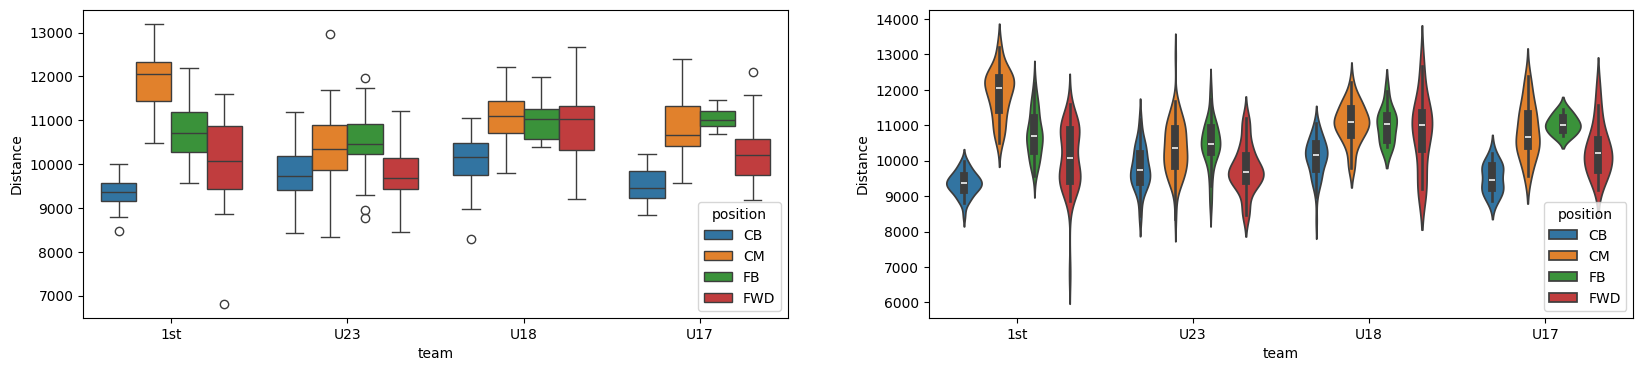

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

sns.boxplot(x = df["team"],
            y = df[measure],
            hue = df["position"],
            ax=axs[0])


sns.violinplot(x = df["team"],
            y = df[measure],
            hue = df["position"],
            ax=axs[1])

In [ ]:
sns.rid